## 데이터 준비하기

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [8]:
fish_target = fish['Species'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

<br>

## k-최근접 이웃 분류기의 확률 예측

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


다중 분류(multi-class classification) : 타깃 데이터에 2개 이상의 클래스가 포함된 문제

KNeighborsClassifier에서 정렬된 타깃값과 pd.unique(fish['Species'])에서 출력된 타깃값의 순서가 다름
<br> KNeighborsClaasifier에서는 알파벳 순으로 정렬됨
<br> 정렬된 타깃값은 classes_ 속성에서 알 수 있음

In [14]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [15]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환함

In [16]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

predict_proba() 메서드의 출력 순서는 classes_ 속성에서 출력된 결과와 같음
<br> 즉 첫 번째 열은 'Bream'에 대한 확률, 두 번째 열은 'Parkki'에 대한 확률

네 번째 샘플의 최근접 이웃의 클래스를 확인해 보자
<br> kneighbors() 메서드의 입력은 2차원 배열이여야 함.
<br> 넘파이 배열의 슬라이싱 연산자는 항상 2차원 배열을 생성하므로, 슬라이싱을 사용

In [18]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

but 3개의 최근접 이웃만을 활용하다보니, 가능한 확률은 0, 1/3, 2/3, 1이 전부

<br>

<br>

# 로지스틱 회귀
분류 모델
<br> 선형 회귀와 동일하게 선형 방정식을 학습함

## 시그모이드 함수
z가 무한하게 큰 음수일 경우 0, 무한하게 큰 양수일 경우 1에 근사
<br> 0~1 사이의 값을 확률로 해석할 수 있음

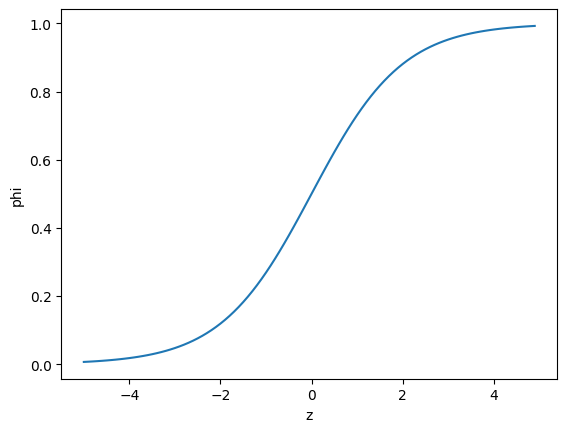

In [19]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)

plt.xlabel('z')
plt.ylabel('phi')
plt.show()

<br>

<br>

## 로지스틱 회귀로 이진 분류 수행하기

이진 분류의 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5 보다 작으면 음성 클래스
<br> 사이킷런에서 0.5일 때, 음|성 클래스로 판단함(라이브러리마다 다름)

### 불리언 인덱싱(boolean indexing)
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있음

In [20]:
#예시 - 문자열에서 'A'와 'C'만 추출
char_arr = np.array(['A','B','C','D','E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [25]:
# 도미(Bream)와 빙어(Smelt)의 행만 추출
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

<br>

### 로지스틱 회귀 모델 훈련

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [29]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [30]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

-> 첫 번째 열이 음성 클래스(0)에 대한 확률이고 두 번째 열이 양성 클래스(1)에 대한 확률임

<br>

Bream과 Smelt 중 어떤 것이 양성 클래스인지 알기 위해서 classes_ 속성을 통해 순서를 확인하면 다음과 같음

In [31]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

-> 'Bream'이 음성 클래스, 'Smelt'가 양성 클래스

<br>

로지스틱 회귀가 학습한 계수를 확인하면 다음과 같음

In [33]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


LogisticRegression 모델로 z 값 계산 by decision_function() 메서드

decisions = lr.decision_function(train_bream_smelt[:5])
decisions

z 값을 시그모이드 함수에 통과시키면 확률 값을 알 수 있음
<br> scipy 라이브러리에서 시그모이드 함수 제공. expit()

In [36]:
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

-> 출력값을 보면 predict_prob() 메서드 출력의 두 번째 열의 값과 동일
<br> 즉 decision_function() 메서드는 양성 클래스에 대한 z 값을 반환

<br>

<br>

## 로지스틱 회귀로 다중 분류 수행하기

LogisticRegression 클래스
1. 반복적인 알고리즘 사용. max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100
2. 릿지 회귀와 같이 계수의 제곱을 규제. L2 규제라고 부름
<br> 릿지 회귀 : alpha 매개변수로 규제를 조절. alpha가 커지면 규제도 커짐
<br> 로지스틱 회귀 : C 매개변수로 규제를 조절. C가 작을수록 규제가 커짐, 기본값은 1

In [39]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [40]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [41]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals =3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [42]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [43]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


#### 소프트맥스 함수 (softmax function)
소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듦
<br> 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 부름
<br> 하나의 선형 방정식을 훈련하는 이진 분류와 달리, 다중 분류일 경우 클래스 개수만큼 방정식을 훈련함

7개의 z값을 z1에서 z7이라고 붙임
<br> e_sum = e^z1 + e^z2 + ... + e^z7
<br>
<br> s1 = e^z1 / e_sum, s2 = e^z2 / e_sum , ...
<br> s1부터 s7을 모두 합하면 1이 되므로 확률로 해석할 수 있음

In [46]:
#1. z1~z7까지의 값을 구함
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals = 2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [48]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
np.round(proba, decimals = 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

-> softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정함
<br> axis = 1인 경우 각 행, 즉 각 샘플에 대한 소프트맥스를 계산함
<br> 만약 axis 매개변수를 지정하지 안으면 배열 전체에 대해 소프트맥스를 계산함